In [10]:
from bs4 import BeautifulSoup
import requests

In [11]:
request = requests.get("http://www.billboard.com/charts/hot-100/1990-01-06")

In [12]:
request.status_code

200

In [13]:
soup = BeautifulSoup(request.content, 'html.parser')

In [14]:
def clean(lst):
    clean_lst = []
    for i in lst:
        j = i.text.strip()
        clean_lst.append(j)
    return clean_lst

In [38]:
clean(billboard_week)

NameError: name 'billboard_week' is not defined

In [37]:
billboard_dict = get_data('2018-01-13')

In [36]:
def get_data(date_):
    url = "http://www.billboard.com/charts/hot-100/"+date_
    request = requests.get(url)
    if request.status_code != 200:
        return False
    soup = BeautifulSoup(request.content, 'html.parser')
    
    song_titles = clean(soup.find_all(class_ = 'chart-element__information__song text--truncate color--primary'))
    song_rankings = clean(soup.find_all(class_ = 'chart-element__rank__number'))
    song_artists = clean(soup.find_all(class_ = 'chart-element__information__artist text--truncate color--secondary'))
    peak_ranking = clean(soup.find_all(class_ = 'chart-element__meta text--center color--secondary text--peak'))
    weeks_top_100 = clean(soup.find_all(class_ = 'chart-element__meta text--center color--secondary text--week'))
    billboard_week = clean(soup.find_all(class_ = "date-selector__button button--link"))
    
    weekly_ranking = []
    for i in range(len(song_rankings)):
        song_list = [song_rankings[i], song_titles[i], song_artists[i], peak_ranking[i], weeks_top_100[i]]
        weekly_ranking.append(song_list)
    weekly_dict = {billboard_week[0]: weekly_ranking}
    return weekly_dict

In [16]:
def iterate_dates(start_y, start_m, start_d, end_y, end_m, end_d):
    import datetime 

    start_date = datetime.date(start_y, start_m, start_d)
    end_date = datetime.date(end_y, end_m, end_d)
    saturdays = []
    while start_date < end_date:
        if start_date.weekday() != 5:
            start_date += datetime.timedelta(days=1)
        else: 
            saturdays.append(start_date.isoformat())
        start_date += datetime.timedelta(days=1)
    return saturdays

In [30]:
import mysql.connector 
from mysql.connector import errorcode
import config
import json

In [31]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
cursor = cnx.cursor()

In [32]:
cursor.execute("""CREATE TABLE billboard(
                  date TEXT,
                  rank INT,
                  song_name TEXT,
                  artist TEXT,
                  peak_rank INT,
                  duration_on_chart INT)""")

In [33]:
cnx.commit()

In [25]:
def format_billboard_dict(billboard_dict):
    billboard_tuples_lst = []
    for key, value in billboard_dict.items():
#         print(key)
#         print(value)
        for i in value:
            billboard_tuple = (key, i[0], i[1], i[2], i[3], i[4])
            billboard_tuples_lst.append(billboard_tuple)
#         stmt = "INSERT INTO top_movies_info (id, original_title, budget, vote_average, revenue, release_date, runtime, genre) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
#         cursor.execute(stmt, movie_tuple)
#     print(f'movie_tuple = {movie_tuple}')
    return billboard_tuples_lst

In [28]:
def put_in_db_billboard(billboard_tuples_lst):
    cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
    cursor = cnx.cursor()
    stmt = "INSERT INTO billboard (date, rank, song_name, artist, peak_rank, duration_on_chart) VALUES (%s, %s, %s, %s, %s, %s)"
    for i in billboard_tuples_lst:
        cursor.execute(stmt, i)
        cnx.commit()

In [34]:
put_in_db_billboard(billboard_tuples_lst)

In [13]:
iterate_dates(1997, 11, 6, 2014, 11, 6)

['1997-11-08',
 '1997-11-15',
 '1997-11-22',
 '1997-11-29',
 '1997-12-06',
 '1997-12-13',
 '1997-12-20',
 '1997-12-27',
 '1998-01-03',
 '1998-01-10',
 '1998-01-17',
 '1998-01-24',
 '1998-01-31',
 '1998-02-07',
 '1998-02-14',
 '1998-02-21',
 '1998-02-28',
 '1998-03-07',
 '1998-03-14',
 '1998-03-21',
 '1998-03-28',
 '1998-04-04',
 '1998-04-11',
 '1998-04-18',
 '1998-04-25',
 '1998-05-02',
 '1998-05-09',
 '1998-05-16',
 '1998-05-23',
 '1998-05-30',
 '1998-06-06',
 '1998-06-13',
 '1998-06-20',
 '1998-06-27',
 '1998-07-04',
 '1998-07-11',
 '1998-07-18',
 '1998-07-25',
 '1998-08-01',
 '1998-08-08',
 '1998-08-15',
 '1998-08-22',
 '1998-08-29',
 '1998-09-05',
 '1998-09-12',
 '1998-09-19',
 '1998-09-26',
 '1998-10-03',
 '1998-10-10',
 '1998-10-17',
 '1998-10-24',
 '1998-10-31',
 '1998-11-07',
 '1998-11-14',
 '1998-11-21',
 '1998-11-28',
 '1998-12-05',
 '1998-12-12',
 '1998-12-19',
 '1998-12-26',
 '1999-01-02',
 '1999-01-09',
 '1999-01-16',
 '1999-01-23',
 '1999-01-30',
 '1999-02-06',
 '1999-02-

In [39]:
!pip install deezer-python

In [41]:
import deezer as deezer

In [42]:
client = deezer.Client()

In [43]:
print(client)

In [44]:
a = client.search('ariana grande')

In [45]:
a

[<Track: 7 rings>,
 <Track: thank u, next>,
 <Track: break up with your girlfriend, i'm bored>,
 <Track: no tears left to cry>,
 <Track: God is a woman>,
 <Track: Dangerous Woman>,
 <Track: Into You>,
 <Track: breathin>,
 <Track: One Last Time>,
 <Track: imagine>,
 <Track: bad idea>,
 <Track: bloodline>,
 <Track: NASA>,
 <Track: needy>,
 <Track: fake smile>,
 <Track: in my head>,
 <Track: ghostin>,
 <Track: Focus>,
 <Track: Be Alright>,
 <Track: Touch It>,
 <Track: boyfriend>,
 <Track: make up>,
 <Track: Greedy>,
 <Track: sweetener>,
 <Track: Moonlight>]

In [46]:
b = client.get_artist(1562681)

In [48]:
type(b)

deezer.resources.Artist

In [52]:
list(b.get_albums())

[<Album: thank u, next>,
 <Album: Sweetener>,
 <Album: Dangerous Woman>,
 <Album: Christmas & Chill>,
 <Album: Bang Bang Remixes>,
 <Album: My Everything (Deluxe)>,
 <Album: Christmas Kisses>,
 <Album: Yours Truly>,
 <Album: Yours Truly>,
 <Album: Christmas Kisses>,
 <Album: Don’t Call Me Angel (Charlie’s Angels)>,
 <Album: boyfriend>,
 <Album: MONOPOLY>,
 <Album: 7 rings (Remix)>,
 <Album: Side To Side (Remixes)>,
 <Album: Jason's Song (Gave It Away)>,
 <Album: My Favorite Part>,
 <Album: Into You (3LAU Remix)>,
 <Album: Into You (Alex Ghenea Remix)>,
 <Album: Focus>,
 <Album: Santa Tell Me>,
 <Album: Bang Bang>,
 <Album: Put Your Hearts Up>]

In [ ]:
get_data("1990-01-07")

In [ ]:
# song titles
song_titles = soup.find_all(class_ = 'chart-element__information__song text--truncate color--primary')

In [ ]:
# ranking
song_rankings = soup.find_all(class_ = 'chart-element__rank__number')

In [ ]:
#artist
song_artists = soup.find_all(class_ = 'chart-element__information__artist text--truncate color--secondary')

In [ ]:
#peak song ranking
peak_ranking = soup.find_all(class_ = 'chart-element__meta text--center color--secondary text--peak')

In [7]:
# num weeks on top 100
weeks_top_100 = soup.find_all(class_ = 'chart-element__meta text--center color--secondary text--week')

In [8]:
billboard_week = soup.find_all(class_ = "date-selector__button button--link")

In [317]:
x=4
x*3

12

## Spotify API

In [299]:
response = requests.post(
        'https://accounts.spotify.com/api/token',
        params={'grant_type': 'client_credentials', 'client_id': '34b324bc78014a848f50164e97bcde07', 'client_secret':'92969b32d92f471a9cb8abe62eaf3bc2'},
        headers = { 'content-type': "application/x-www-form-urlencoded" })
token = response.json()

In [387]:
def get_token():
    response = requests.post(
        'https://accounts.spotify.com/api/token',
        params={'grant_type': 'client_credentials', 'client_id': 'c897a79a82ef430e94f3bb33ffec9f1b', 'client_secret':'4684c4c3f05c43329e3829d48eeaf3f9'},
        headers = { 'content-type': "application/x-www-form-urlencoded" })
    token = response.json()
    return token

In [250]:
token = response.json()

In [218]:
def list_from_billboard(year):
    """
    Selects distinct song artist pairs from billboard table from a specific year
    and places them all into a list
    """

    cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        password = config.passwd,
        database = 'music')
    cursor = cnx.cursor()
    q = """SELECT DISTINCT song_name, artist FROM billboard WHERE date LIKE '%"""+str(year)+"'"
    cursor.execute(q)
    artist_song_list = cursor.fetchall()
    return artist_song_list



In [ ]:
failure_list = []

In [394]:

def make_track_info_list(artist_song_list):
    """
    iterates through each song/artist in artist_song_list and calls
    song ID, album, explicit, release date, popularity, and duration
    from spotify API. Places all this info into a list for each song 
    and returns a list of these lists.
    """
    token = get_token()
    track_info_list = []
    for i in artist_song_list:
        song_name = str(i[0])
        artist = str(i[1])
        song_list = []
        if '**' in song_name:
            song_name = song_name.replace("**","uc")
        if '(#' in song_name:
            song_name = song_name.replace('(#','')
        if ')' in song_name:
            song_name = song_name.replace(')','')
        if '%' in song_name:
            song_name = song_name.replace('%', 'percent')
  
        response = requests.get(f'https://api.spotify.com/v1/search?q={song_name}+{artist.split()[0]}&type=track',
             headers={'Authorization': 'Bearer '+token['access_token']})
        print(response.status_code)
        print(song_name,artist)
        track_info = response.json()
    

        if response.status_code == 400 or response.status_code ==501 or track_info['tracks']['items'] == []:
            failure_list.append([song_name, artist])
            #print(track_info['tracks']['items'])
            continue
        if response.status_code == 401:
            token = get_token()
            response = requests.get(f'https://api.spotify.com/v1/search?q={song_name}+{artist.split()[0]}&type=track',
             headers={'Authorization': 'Bearer '+token['access_token']})
            track_info = response.json()
        

           
        print(len(track_info['tracks']['items']))
        song_list.append(track_info['tracks']['items'][0]['id'])
        song_list.append(i[0])
        song_list.append(track_info['tracks']['items'][0]['duration_ms'])
        song_list.append(i[1])
        song_list.append(track_info['tracks']['items'][0]['album']['id'])
        song_list.append(track_info['tracks']['items'][0]['album']['name'])
        song_list.append(track_info['tracks']['items'][0]['explicit'])
        song_list.append(track_info['tracks']['items'][0]['album']['release_date'])
        song_list.append(track_info['tracks']['items'][0]['popularity'])
        track_info_list.append(song_list)
   
    return track_info_list

#Cash Me Outside (#CashMeOutside) 

In [389]:
def format_track_list(track_info_list):
    """
    Iterates through each list in track_info_list and converts it into a tuple.
    Returns a list of all of these tuples.
    """
    song_tuples_list = []
    for i in track_info_list:
        song_tuple = (i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8])
        song_tuples_list.append(song_tuple)
        
    
    return song_tuples_list

In [390]:
def put_in_db_songs(song_tuples_list):
    """
    Inserts each tuple in song_tuples_list into SQL database
    """
    cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
    cursor = cnx.cursor()
    stmt = "INSERT INTO song_info (song_id, song_name, length, artist, album_id, album, explicit, release_date, popularity) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
    for i in song_tuples_list:
        cursor.execute(stmt, i)
        cnx.commit()
    

In [396]:
def all_at_once(year):
    """
    takes songs from year from billboard table, uses those songs to call
    API, formats API info into tuples, puts it into song_info table all at once.
    """
    artist_song_list = list_from_billboard(year)
    #print(artist_song_list)
    track_info_list = make_track_info_list(artist_song_list)
    #print(track_info_list)
    song_tuples_list = format_track_list(track_info_list)
    #print(song_tuples_list)
    put_in_db_songs(song_tuples_list)

all_at_once(2003)



200
Lose Yourself Eminem
20
200
Work It Missy "Misdemeanor" Elliott
20
200
Air Force Ones Nelly Featuring Kyjuan, Ali & Murphy Lee
20
200
'03 Bonnie & Clyde Jay-Z Featuring Beyonce Knowles
20
200
Bump, Bump, Bump B2K & P. Diddy
20
200
Jenny From The Block Jennifer Lopez Featuring Styles & Jadakiss
20
200
Beautiful Christina Aguilera
20
200
Don't Mess With My Man Nivea Featuring Brian & Brandon Casey
20
200
The Game Of Love Santana Featuring Michelle Branch
20
200
Landslide Dixie Chicks
20
200
Miss You Aaliyah
20
200
I'm With You Avril Lavigne
20
200
She Hates Me Puddle Of Mudd
20
200
Underneath It All No Doubt Featuring Lady Saw
20
200
All I Have Jennifer Lopez Featuring LL Cool J
20
200
Love Of My Life (An Ode To Hip Hop Erykah Badu Featuring Common
20
200
Cry Me A River Justin Timberlake
20
200
Your Body Is A Wonderland John Mayer
20
200
Thugz Mansion 2Pac
13
200
Family Portrait P!nk
5
200
Mesmerize Ja Rule Featuring Ashanti
20
200
When The Last Time Clipse
18
200
Gimme The Light Sea

200
Step Daddy Hitman Sammy Sam
20
200
Right Thurr Chingy
20
200
How You Want That Loon Featuring Kelis
1
200
Crazy In Love Beyonce Featuring Jay Z
20
200
The Love Song Jeff Bates
20
200
Calling All Angels Train
20
200
Forever And For Always Shania Twain
20
200
Seven Nation Army The White Stripes
20
200
Never Leave You - Uh Ooh, Uh Oooh! Lumidee
11
200
Red Dirt Road Brooks & Dunn
20
200
P.I.M.P. 50 Cent
20
200
Almost Home Craig Morgan
20
200
Tal Vez Ricky Martin
20
200
Are You Happy Now? Michelle Branch
20
200
Act A Fool Ludacris
20
200
Like Glue Sean Paul
20
200
Flipside Freeway Featuring Peedi Crakk
3
200
Make Me A Song Kiley Dean
200
Into You Fabolous Featuring Tamia Or Ashanti
20
200
Where Is The Love? The Black Eyed Peas
20
200
I Want You Thalia Featuring Fat Joe
20
200
In Those Jeans Ginuwine
17
200
Celebrity Brad Paisley
20
200
Come Over Aaliyah
20
200
Frontin' Pharrell Featuring Jay-Z
15
200
Swing, Swing The All-American Rejects
20
200
Tell Me Something Bad About Tulsa George S

## Set up Song Info table

In [166]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
cursor = cnx.cursor()
cursor.execute("""CREATE TABLE song_info (
                    song_id VARCHAR(55),
                    song_name TEXT,
                    length INT,
                    artist TEXT,
                    album_id TEXT,
                    album TEXT,
                    explicit BOOL,
                    release_date DATETIME,
                    popularity INT)""")
cnx.commit()

In [111]:
artist_song_list[:2]

[('Perfect', 'Ed Sheeran'), ('Havana', 'Camila Cabello Featuring Young Thug')]

In [110]:
Print(track_info.keys())

dict_keys(['error'])


In [82]:
ariana.json()

{'artists': {'href': 'https://api.spotify.com/v1/search?query=ariana+grande&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
    'followers': {'href': None, 'total': 36136546},
    'genres': ['dance pop', 'pop', 'post-teen pop'],
    'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
    'id': '66CXWjxzNUsdJxJ2JdwvnR',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/b1dfbe843b0b9f54ab2e588f33e7637d2dab065a',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/b189cb24f45db92780d1aa6c81aee69b8defa03a',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/3c4516cf74d09cf93db7536ce8826df28fba4156',
      'width': 160}],
    'name': 'Ariana Grande',
    'popularity': 93,
    'type': 'artist',
    'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
  'limit': 20,
  'next': None,
  'offset': 0,
  'previous': None,
  't

## Add a column 'recent' and put into pandas dataframe

In [444]:

cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
cursor = cnx.cursor()
cursor.execute("""SELECT DISTINCT *
FROM song_info """)

df_song_info = pd.DataFrame(cursor.fetchall())
df_song_info.columns = [x[0] for x in cursor.description]

df_song_info['recent'] = df_song_info['release_date'].map(lambda x: True if x.year >= 2010 else False)
df_song_info['recent']
df_song_info

,song_id,song_name,length,artist,album_id,album,explicit,release_date,popularity,recent
0,0tgVpDi06FyKpA1z0VMD4v,Perfect,263400,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),0,2017-03-03,87,True
1,1rfofaqEpACxVEHIZBJe6W,Havana,217306,Camila Cabello Featuring Young Thug,2vD3zSQr8hNlg0obNel4TE,Camila,0,2018-01-12,85,True
2,7MXVkk9YMctZqd1Srtv4MB,Starboy,230453,The Weeknd Featuring Daft Punk,2ODvWsOgouMbaA5xf0RkJe,Starboy,1,2016-11-25,82,True
3,6fujklziTHa8uoM5OQSfIo,Black Beatles,291893,Rae Sremmurd Featuring Gucci Mane,5v6iBhIlflzR9rEd1LAMbd,SremmLife 2 (Deluxe),1,2016-08-12,76,True
4,7BKLCZ1jbUBVqRi2FVlTVw,Closer,244960,The Chainsmokers Featuring Halsey,0rSLgV8p5FzfnqlEk4GzxE,Closer,0,2016-07-29,85,True
5,6b8Be6ljOzmkOmFslEb23P,24K Magic,225983,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,24K Magic,0,2016-11-17,78,True
6,1lItf5ZXJc1by9SbPeljFd,Juju On That Beat (TZ Anthem),144244,Zay Hilfigerrr & Zayion McCall,5sQTfUX9uSwfCtPiYGO20V,Juju On That Beat (TZ Anthem),0,2016-09-30,64,True
7,1pKeFVVUOPjFsOABub0OaV,Side To Side,226160,Ariana Grande Featuring Nicki Minaj,3OZgEywV4krCZ814pTJWr7,Dangerous Woman,1,2016-05-20,81,True
8,0lYBSQXN6rCTvUZvg9S0lU,Let Me Love You,205946,DJ Snake Featuring Justin Bieber,02sEJTj1sye1JaqxqpcSCp,Encore,0,2016-08-05,81,True
9,1nueTG77MzNkJTKQ0ZdGzT,Don't Wanna Know,214265,Maroon 5 Featuring Kendrick Lamar,3ThQ5dvf9wlqB0C7evh5nH,Red Pill Blues (Deluxe),0,2018-06-15,69,True


In [ ]:
import numpy as np
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

## Chi Squared Test
Does song length differ between recent songs and past songs?

In [604]:
# test if there is a difference in song length between recent and past songs using Chi squared test
df2 = df_song_info[['length','recent']]
df2
df2['length'] = pd.cut(x=df2.length, bins=[0, 60000, 90000, 120000, 150000, 180000, 210000, 240000, 270000, 300000, 330000, 360000, 390000, 420000])
df2

length_table = pd.crosstab(df2['length'], df2['recent'])
length_table
chi2, p, dof, expected = stats.chi2_contingency(length_table)
print(chi2, p, dof, expected)


130.42224665883268 5.077651909169691e-22 12 [[8.65661412e-01 1.13433859e+00]
 [1.73132282e+00 2.26867718e+00]
 [8.65661412e+00 1.13433859e+01]
 [3.72234407e+01 4.87765593e+01]
 [1.48460932e+02 1.94539068e+02]
 [6.15485264e+02 8.06514736e+02]
 [8.59168951e+02 1.12583105e+03]
 [4.99919465e+02 6.55080535e+02]
 [2.19445168e+02 2.87554832e+02]
 [8.57004798e+01 1.12299520e+02]
 [3.24623029e+01 4.25376971e+01]
 [1.29849212e+01 1.70150788e+01]
 [3.89547635e+00 5.10452365e+00]]


/Users/KevinSun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# remove extreme outliers from sample
df_song_info[df_song_info['length']>600000]
df_song_info = df_song_info.set_index("song_name")
df_song_info = df_song_info.drop("Not A Bad Thing", axis=0)
df_song_info = df_song_info.drop("Trapped In The Closet", axis=0)

Text(0, 0.5, 'milliseconds')

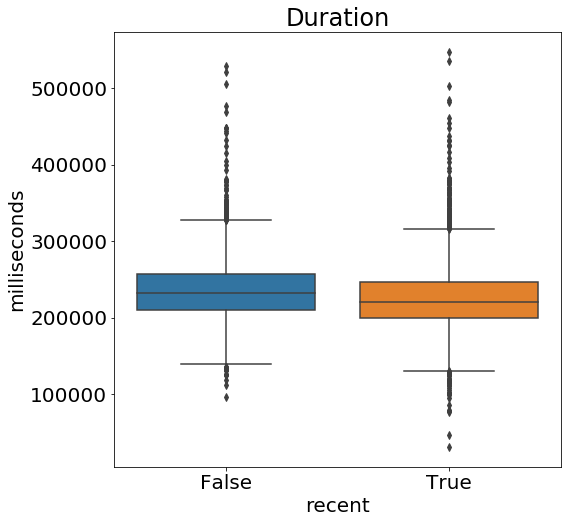

In [616]:
import matplotlib.pyplot as plt
df2 = df_song_info[['length','recent']]
df2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.boxplot(x = 'recent', y='length',  data=df2, ax=ax)
plt.title('Duration')
plt.rcParams.update({'font.size': 20})
plt.ylabel('milliseconds')

## Two sample t-test
Is there a difference in popularity between clean and explicit songs?

In [489]:
#difference in popularity between explicit and clean using two sample t test
df_song_info
df_expl = df_song_info[df_song_info['explicit'] == 1]
df_clean = df_song_info[df_song_info['explicit'] == 0]
df_expl = df_expl['popularity']
df_expl
df_clean = df_clean['popularity']
t, p = ttest_ind(df_expl, df_clean, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

# Explicit songs are more popular on average than clean songs; could be because current songs are more popular and explicit

ttest_ind:            t = 12.5453  p = 2.50156e-35


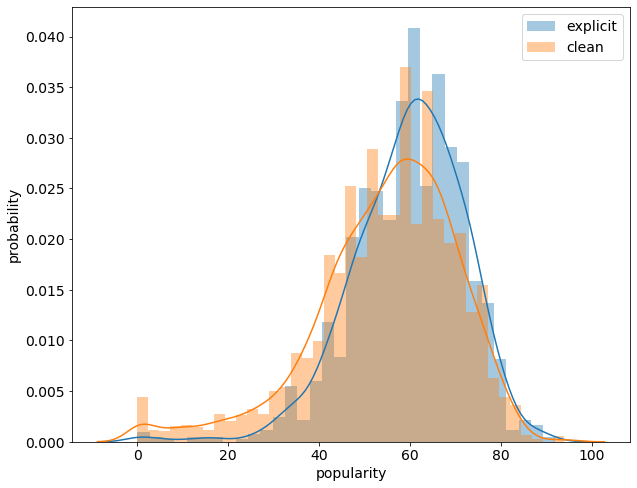

In [610]:

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
sns.distplot(df_song_info[df_song_info['explicit']==True].popularity, ax=ax1, norm_hist=True, label='explicit')
sns.distplot(df_song_info[df_song_info['explicit']==False].popularity, ax=ax1, norm_hist=True, label = 'clean')
plt.ylabel('probability')
plt.legend()
plt.rcParams.update({'font.size': 20})